In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

# Random Forests

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

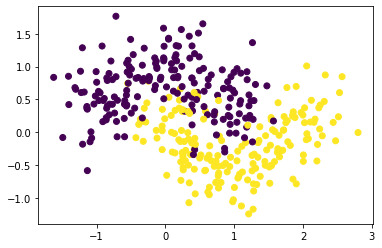

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

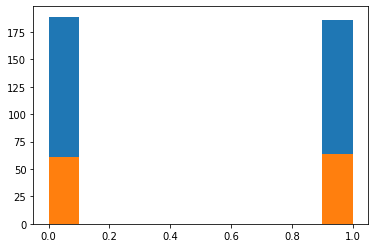

In [6]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

```python
BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
```

i

```python
RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

In [10]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf  = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

rfc  = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

for clf in (bag_clf, rfc):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))



BaggingClassifier 0.912
RandomForestClassifier 0.912


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


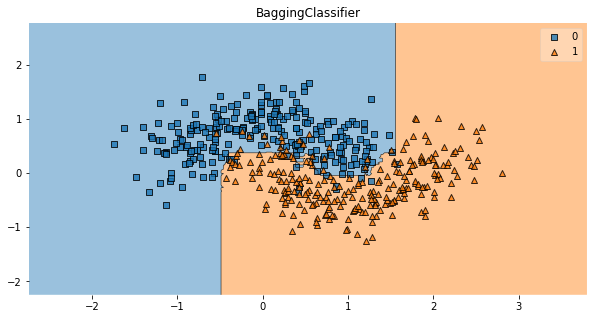

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


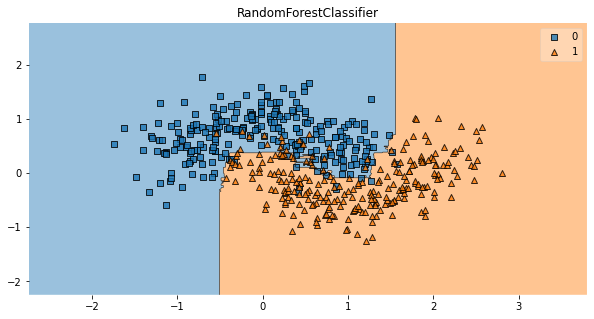

In [16]:
from mlxtend.plotting import plot_decision_regions

clfs = [bag_clf, rfc]
clf_names = ['BaggingClassifier', 'RandomForestClassifier']

for i in range (len(clfs)):
  plt.figure(figsize=(10,5))
  plot_decision_regions(X, y, clfs[i])
  plt.title(clf_names[i])
  plt.show()

# Ciekawostka - Extra-Trees 


* Gdy budujemy kolejne drzewa  w losowym lesie, w każdym węźle rozpatrywany jest losowy podzbiór elementów do podziału. 

* Możliwe jest stworzenie drzewa jeszcze bardziej losowego, wykorzystując losowe podziały dla każdej cechy, zamiast szukać najlepszych możliwych podziału (jak w przypadku zwykłych drzew decyzyjnych).

* Taki las losowy nazywa się **Extremely Randomized Trees** (lub **Extra-Trees** w skrócie). 

* Możesz utworzyć klasyfikator **Extremely Randomized Trees** za pomocą klasy **ExtraTreesClassifier** z Scikit-Learn. 

* Jego API jest identyczne z klasą RandomForestClassifier. 


# Zad.

Naucz 

```python
ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

i porównaj z powyższymi.

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
etc = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

In [15]:
for clf in (bag_clf, rfc, etc):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.912
RandomForestClassifier 0.912
ExtraTreesClassifier 0.912


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


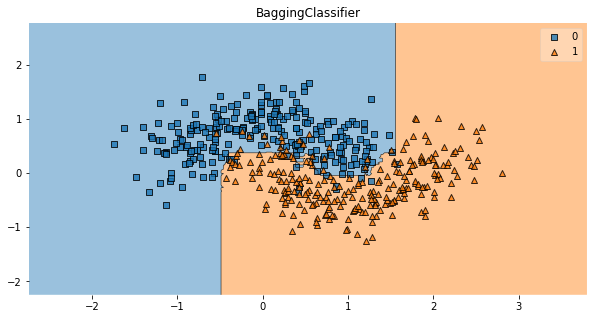

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


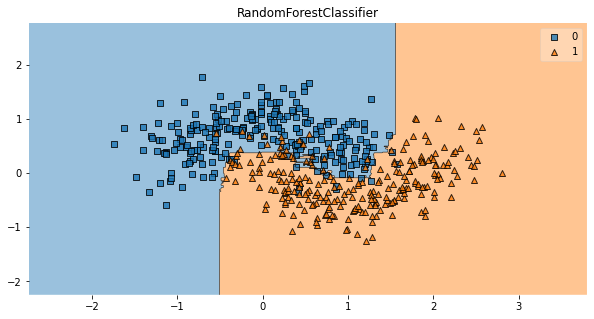

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


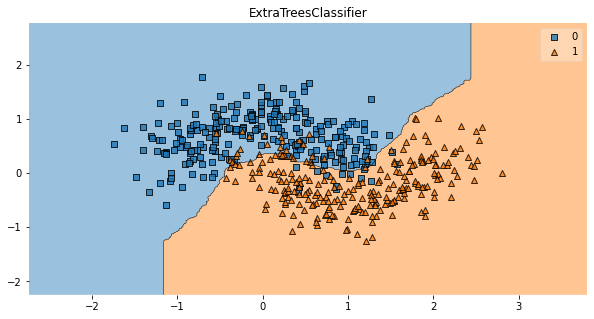

In [17]:
clfs = [bag_clf, rfc, etc]
clf_names = ['BaggingClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier']

for i in range (len(clfs)):
  plt.figure(figsize=(10,5))
  plot_decision_regions(X, y, clfs[i])
  plt.title(clf_names[i])
  plt.show()